# Predicting Car Prices

The goal of this project is to use characteristics of cars to predict their prices. The dataset used contains 205 cars with 26 attributes each, and the dataset can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [329]:
cars = pd.read_csv('/Users/jeremymahoney/data_science/datasets/car_attributes.data', header=None)

In [330]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning and Preliminary Feature Selection

First, let's decide which column is the target and which columns would make good features.

From the [documentation](https://archive.ics.uci.edu/ml/datasets/automobile), here is what each column represents:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

Because the goal of this project is to use attributes to predict the price of a car, the target column is column 26, which represents the price.

For this project, we'll focus on just using the numeric columns as features. Some good numeric feature columns to try could be normalized losses (2), length (11), width (12), height (13), number of cylinders (16), engine size (17), horsepower (22), peak rpm (23), city mpg (24), and highway mpg (25).

We'll trim down the dataset to include only these columns that seem like good features.

In [331]:
cars.columns = cars.columns + 1
cars = cars.loc[:, [2, 11, 12, 13, 16, 17, 22, 23, 24, 25, 26]]
cars[16] = cars[16].map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})
cars.columns = ['normalized_losses', 'length', 'width', 'height', 'cylinders', 'engine_size', 'horsepower',
               'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = cars.replace(to_replace='?', value=np.nan)
cars.head()

,normalized_losses,length,width,height,cylinders,engine_size,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,168.8,64.1,48.8,4,130,111,5000,21,27,13495
1,NaN,168.8,64.1,48.8,4,130,111,5000,21,27,16500
2,NaN,171.2,65.5,52.4,6,152,154,5000,19,26,16500
3,164,176.6,66.2,54.3,4,109,102,5500,24,30,13950
4,164,176.6,66.4,54.3,5,136,115,5500,18,22,17450


It's generally important to avoid columns with missing values for predictive modeling, so now we'll analyze the dataset to locate columns with missing values.

In [332]:
print(len(cars))
cars.info()

205
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    object 
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   cylinders          205 non-null    int64  
 5   engine_size        205 non-null    int64  
 6   horsepower         203 non-null    object 
 7   peak_rpm           203 non-null    object 
 8   city_mpg           205 non-null    int64  
 9   highway_mpg        205 non-null    int64  
 10  price              201 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 17.7+ KB


This chart provides several important pieces of information:
* For four cars, the price column is null, so we'll drop those cars.
* Almost 1 of 4 cars in the dataset doesn't have a value for the normalized losses column. Because this column isn't essential to our classification, we'll drop it for now.
* There are several more columns with a few missing cars, but there are few enough cars in these columns to just drop these cars.
* Not every column is numeric, so we'll change each column to numeric.

In [333]:
cars = cars.drop(axis=1, labels='normalized_losses')
cars = cars.dropna(axis=0)
cars = cars.astype('float64')
cars.info()
cars.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   length       199 non-null    float64
 1   width        199 non-null    float64
 2   height       199 non-null    float64
 3   cylinders    199 non-null    float64
 4   engine_size  199 non-null    float64
 5   horsepower   199 non-null    float64
 6   peak_rpm     199 non-null    float64
 7   city_mpg     199 non-null    float64
 8   highway_mpg  199 non-null    float64
 9   price        199 non-null    float64
dtypes: float64(10)
memory usage: 17.1 KB


,length,width,height,cylinders,engine_size,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,168.8,64.1,48.8,4.0,130.0,111.0,5000.0,21.0,27.0,13495.0
1,168.8,64.1,48.8,4.0,130.0,111.0,5000.0,21.0,27.0,16500.0
2,171.2,65.5,52.4,6.0,152.0,154.0,5000.0,19.0,26.0,16500.0
3,176.6,66.2,54.3,4.0,109.0,102.0,5500.0,24.0,30.0,13950.0
4,176.6,66.4,54.3,5.0,136.0,115.0,5500.0,18.0,22.0,17450.0


Finally, we'll normalize the values in each feature column so that they range from 0 to 1, with 0.5 as the mean and 0.1 as the standard deviation. This normalization allows the algorithm to judge distances between features based on the features' actual variability rather than the size of the numbers associated with the features.

In [334]:
def normalize(column):
    z_scores = (column - column.mean())/column.std()
    multiplied = z_scores * 0.1
    final = multiplied + 0.5
    return final
cars.loc[:, (cars.columns!='price')] = cars.loc[:, (cars.columns!='price')].apply(normalize, axis=0)
cars.head()

,length,width,height,cylinders,engine_size,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.456747,0.415565,0.296657,0.465528,0.507606,0.520246,0.475529,0.434887,0.446223,13495.0
1,0.456747,0.415565,0.296657,0.465528,0.507606,0.520246,0.475529,0.434887,0.446223,16500.0
2,0.476145,0.481885,0.443774,0.653470,0.560297,0.634748,0.475529,0.403888,0.431623,16500.0
3,0.519793,0.515044,0.521419,0.465528,0.457310,0.496280,0.579583,0.481385,0.490022,13950.0
4,0.519793,0.524519,0.521419,0.559499,0.521977,0.530897,0.579583,0.388388,0.373224,17450.0


## Univariate Model

We'll begin by training a univariate K-Nearest Neighbors machine learning model to predict the price of cars based on a single feature.

<BarContainer object of 9 artists>

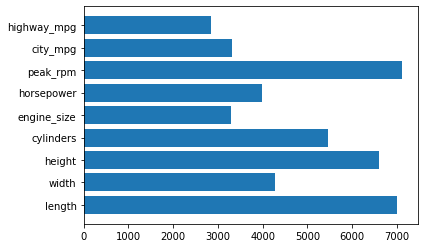

In [335]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(feature, target, df, k):
    train_df = df.iloc[:(int(len(df)*0.75)), :]
    test_df = df.iloc[(int(len(df)*0.75)):, :]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[feature]], train_df[target])
    predictions = knn.predict(test_df[[feature]])
    mse = mean_squared_error(predictions, test_df[target])
    rmse = mse**(1/2)
    return rmse
rmses = {}
for column in cars.columns[:(len(cars.columns)-1)]:
    rmses[column] = knn_train_test(column, 'price', cars, 5)
plt.barh(y=list(rmses.keys()), width=rmses.values())

The highway mpg of a vehicle is the single best predictor of its price in this dataset, followed closely by engine size, city mpg, and horsepower. Let's investigate this more.

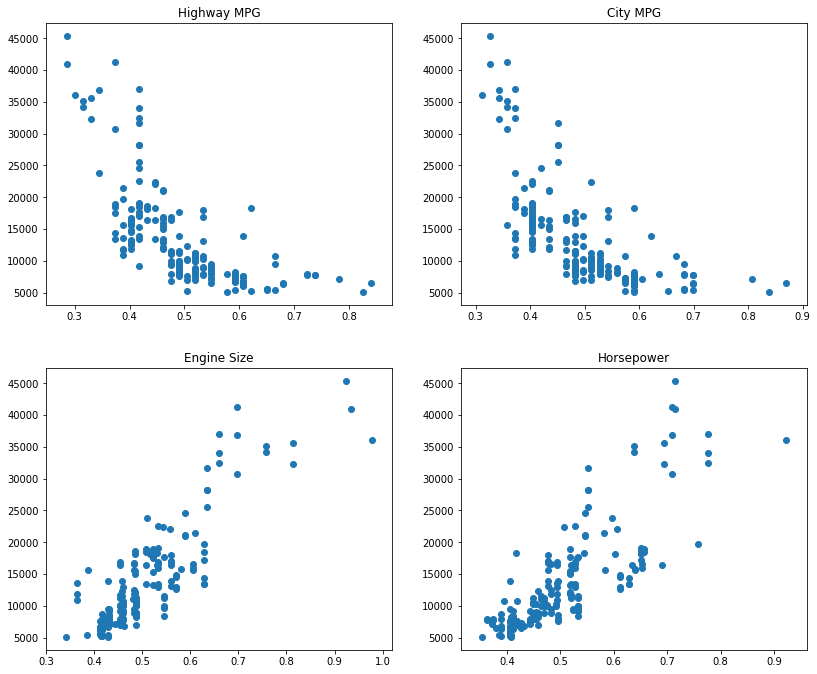

In [336]:
fig = plt.figure(figsize=(12, 10))
highway_mpg = fig.add_subplot(2, 2, 1)
city_mpg = fig.add_subplot(2, 2, 2)
engine_size = fig.add_subplot(2, 2, 3)
horsepower = fig.add_subplot(2, 2, 4)
highway_mpg.scatter(cars['highway_mpg'], cars['price'])
highway_mpg.set_title('Highway MPG')
city_mpg.scatter(cars['city_mpg'], cars['price'])
city_mpg.set_title('City MPG')
engine_size.scatter(cars['engine_size'], cars['price'])
engine_size.set_title('Engine Size')
horsepower.scatter(cars['horsepower'], cars['price'])
horsepower.set_title('Horsepower')
fig.tight_layout(pad=3.0)
plt.show()

Interestingly, there is a negative correlation between mpg and price. Given that there is a positive correlation between engine size/horsepower and price, this makes sense. This suggests that most of the cars in this dataset are older models that were made before hybrid cars became popular. The documentation says that one of the data sources was a book published in 1985, which could explain the presence of older car models.

Now, we'll briefly experiment with various k values on the univariate model to see which one tends to give the smallest root mean squared error value.

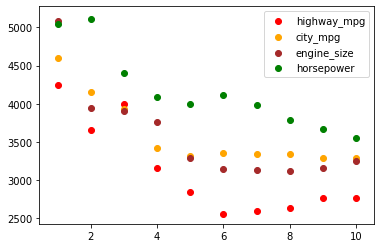

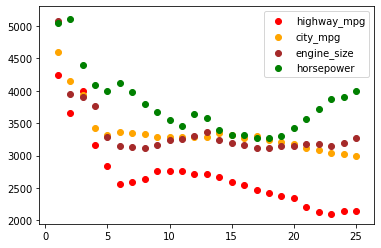

In [337]:
for i in [11, 26]:
    kvalues = list(range(1,i))
    colors = ['red', 'orange', 'brown', 'green']
    best_cols = ['highway_mpg', 'city_mpg', 'engine_size', 'horsepower']
    for count, col in enumerate(best_cols):
        k_errors = {}
        for k in kvalues:
            k_errors[k] = knn_train_test(col, 'price', cars, k)
        plt.scatter(k_errors.keys(), k_errors.values(), color=colors[count], label=col)
    plt.legend()
    plt.show()

The error tends to initially dip near the k value of 5 or 6. More robust cross validation will be necesary to analyze the effectiveness of higher k values.

## Multivariate Features & K-Fold Cross Validation

Now, let's make two modifications to the knn_train_test() function:
* Allow the function to work with multiple features
* Use k-fold cross validation instead of simple train/test validation

In [390]:
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test_kfold(features: list, target, df, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    kf = KFold(10)
    rmses = cross_val_score(knn, df[features], df['price'], scoring='neg_root_mean_squared_error', cv=kf)
    return np.mean(np.absolute(rmses))

Let's test this using the features, in order from best to worst, to see which combination is most effective. We'll stick with the default k value for now.

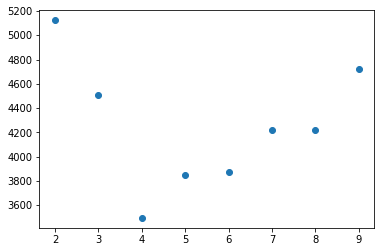

In [391]:
features = ['highway_mpg', 'city_mpg', 'engine_size', 'horsepower', 'width', 'cylinders', 'height',
                'length', 'peak_rpm']
multi_rmses = {}
for i in list(range(2,(len(features)+1))):
    multi_rmses[i] = knn_train_test(features[:i], 'price', cars, 5)
multi_rmses
plt.scatter(multi_rmses.keys(), multi_rmses.values())

It looks like using the top 4 features provides the greatest accuracy, followed by using the top 5 and 6 features.

## Hyperparamater Optimization

Now, we'll optimize the k value for the top 3 models from the last step. 

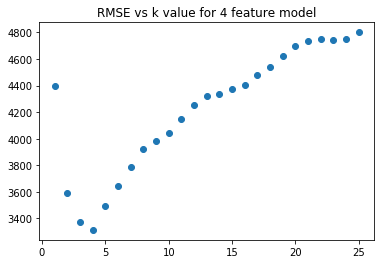

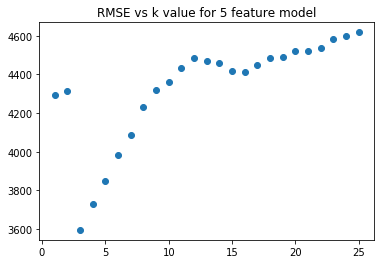

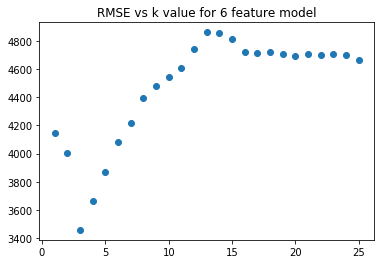

In [392]:
kvalues = list(range(1,26))
multi_k_rmses = {}

for feature_n in [4, 5, 6]:
    multi_k_rmses[feature_n] = {}
    for k in kvalues:
        multi_k_rmses[feature_n][k] = knn_train_test(features[:feature_n], 'price', cars, k)
    plt.scatter(multi_k_rmses[feature_n].keys(), multi_k_rmses[feature_n].values())
    plt.title('RMSE vs k value for {} feature model'.format(feature_n))
    plt.show()

For the 4 feature model, a k value of 4 is optimal.

In [397]:
lowest_rmse = knn_train_test(features[:4], 'price', cars, 4)
error = lowest_rmse/np.mean(cars['price'])
error

0.2501761423481144

## Conclusion

In this project, we determined that using this dataset, a K-Nearest Neighbors model that uses a k value of 4 and the highway MPG, city MPG, horsepower, and engine size attributes of a car is roughly 75% accurate in predicting the price of a car. More steps to try to improve the model could include the following:
* Experiment with other numerical columns in the KNN algorithm
* Incorporate categorical or binary values using a different algorithm